# Blotto 12 Soldiers

In [58]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [59]:
#initialize game
game = Blotto(12,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 10], [1, 2, 9], [1, 3, 8], [1, 4, 7], [1, 5, 6], [2, 2, 8], [2, 3, 7], [2, 4, 6], [2, 5, 5], [3, 3, 6], [3, 4, 5], [4, 4, 4]]
Number of Actions: 12
Action Spaces: {'agent_0': Discrete(12), 'agent_1': Discrete(12)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

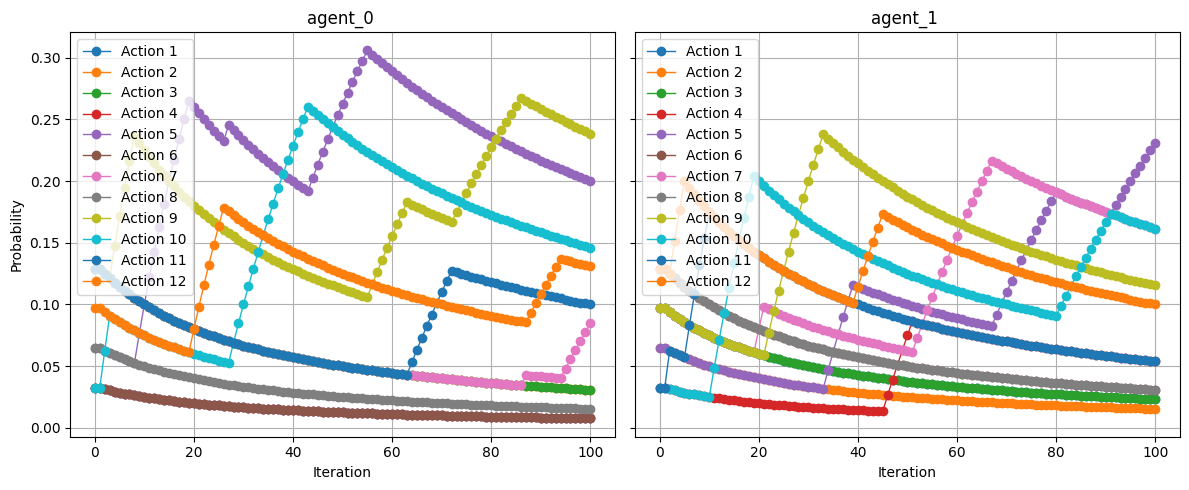

In [68]:
fp_agents = {agent: FictitiousPlay(game, agent) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=100, title_suffix="")

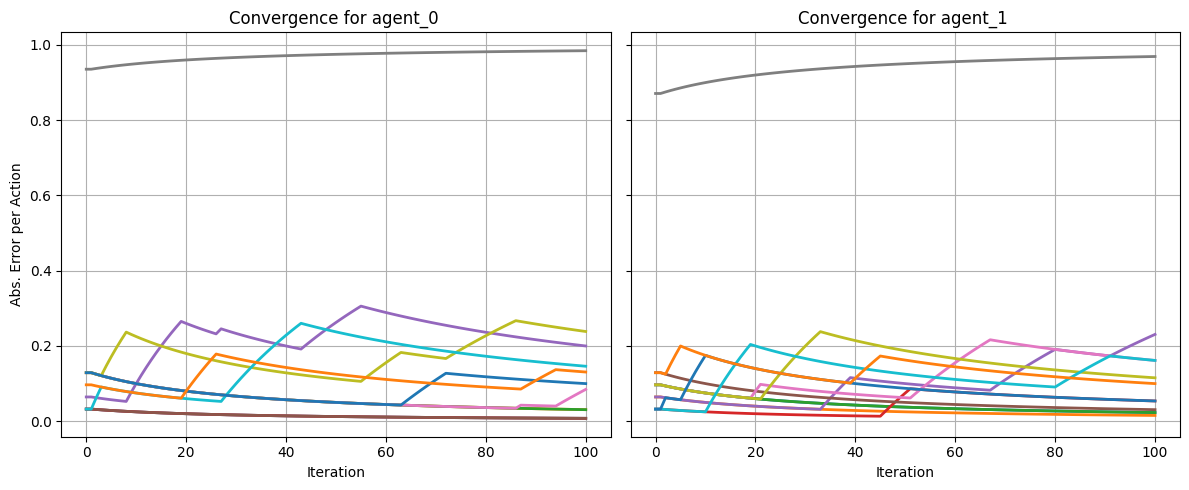

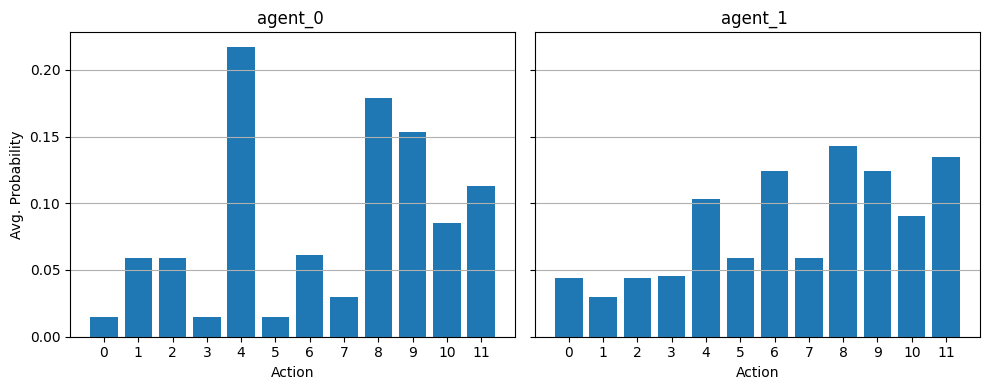

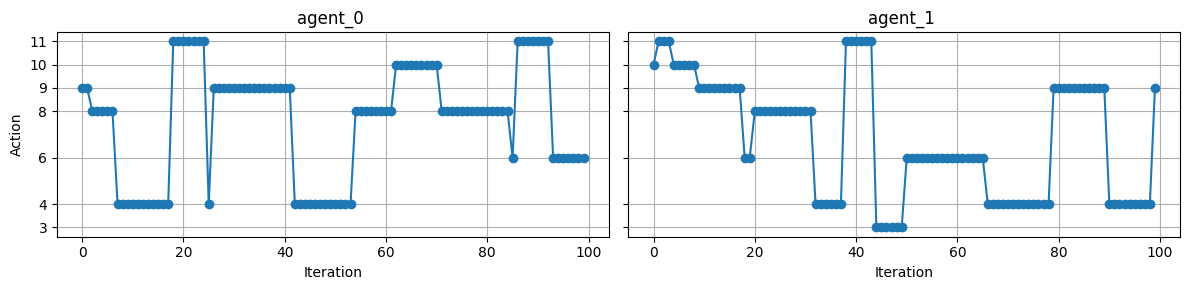

In [69]:

nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [70]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00769231 0.03076923 0.03076923 0.00769231 0.2        0.00769231
 0.08461538 0.01538462 0.23846154 0.14615385 0.1        0.13076923]
agent_1 [0.02307692 0.01538462 0.02307692 0.05384615 0.23076923 0.03076923
 0.16153846 0.03076923 0.11538462 0.16153846 0.05384615 0.1       ]
Action with high probability for agent_0: [2, 5, 5]
Action with high probability for agent_1: [1, 5, 6]


# Regret Matching vs Regret Matching

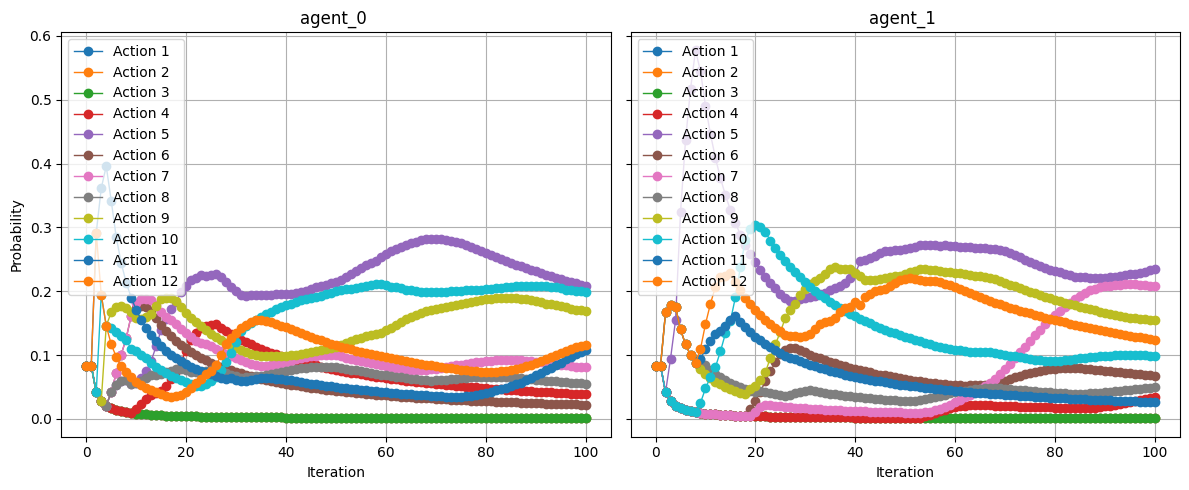

In [71]:
rm_agents = {agent: RegretMatching(game, agent) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=100, title_suffix="")

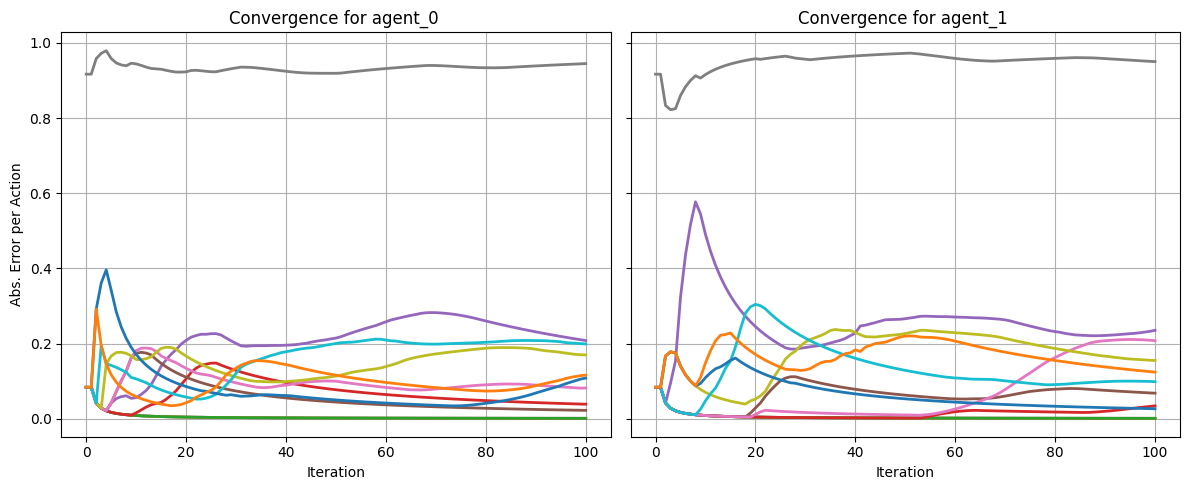

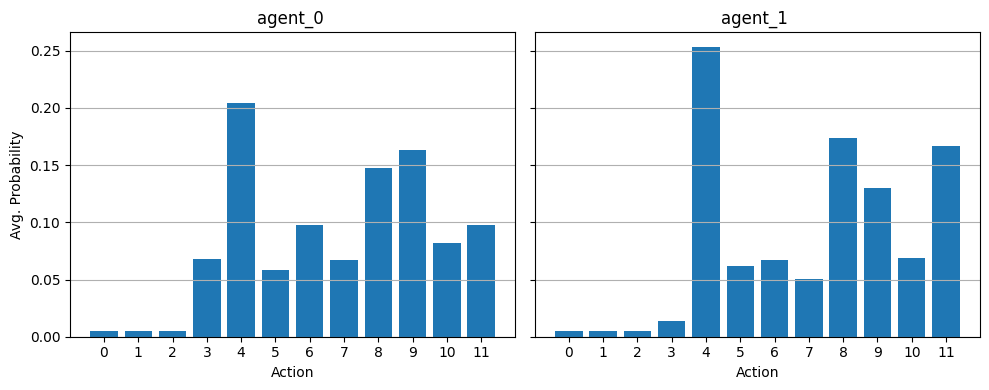

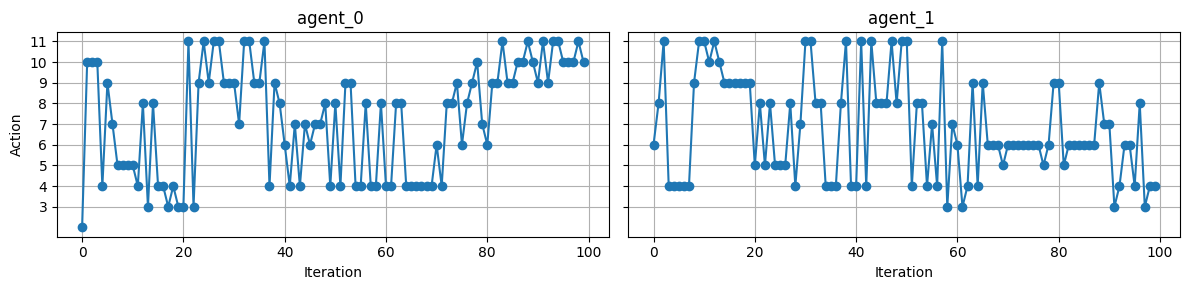

In [72]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [73]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00083333 0.00083333 0.00083333 0.03845215 0.20790051 0.02206091
 0.08161661 0.0551713  0.16956737 0.19886064 0.10801891 0.1158516 ]
agent_1 [0.00083333 0.00083333 0.00083333 0.03406454 0.23509429 0.06777942
 0.20744419 0.04980472 0.15477379 0.09833082 0.02637395 0.12383429]
Action with high probability for agent_0: [1, 5, 6]
Action with high probability for agent_1: [1, 5, 6]


# Fictitious Play vs Regret Matching

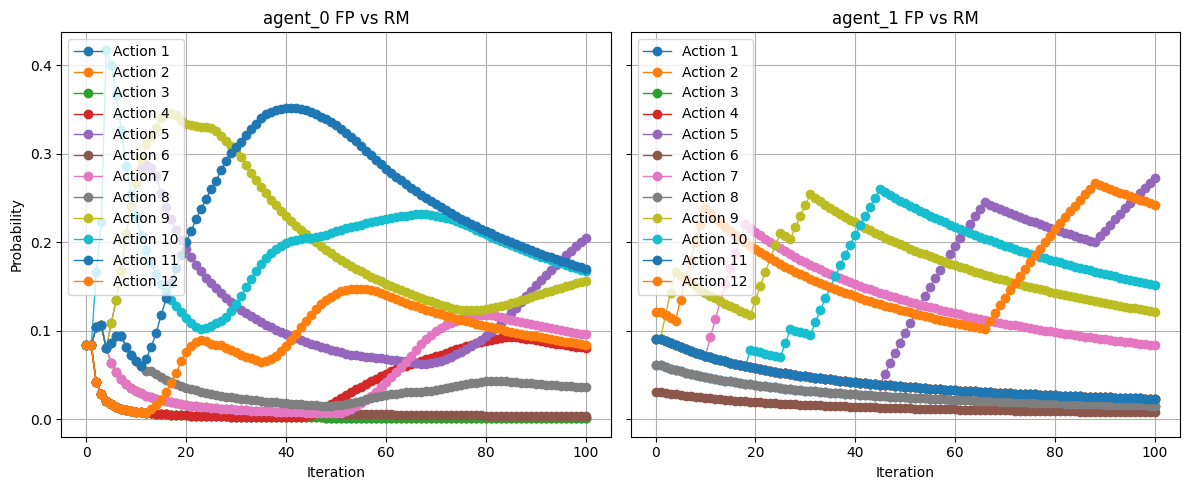

In [74]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0]),
              agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=100, title_suffix="FP vs RM")

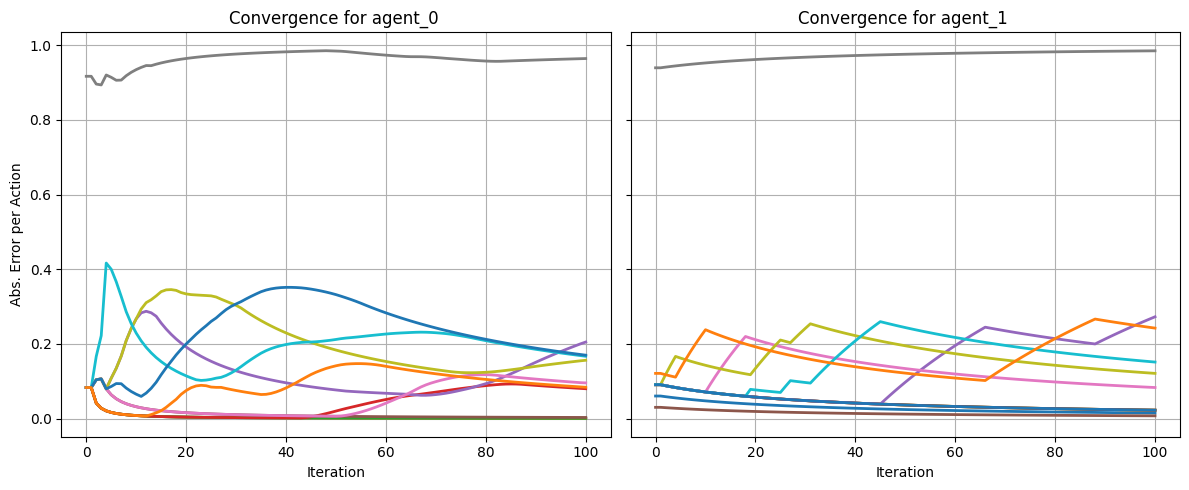

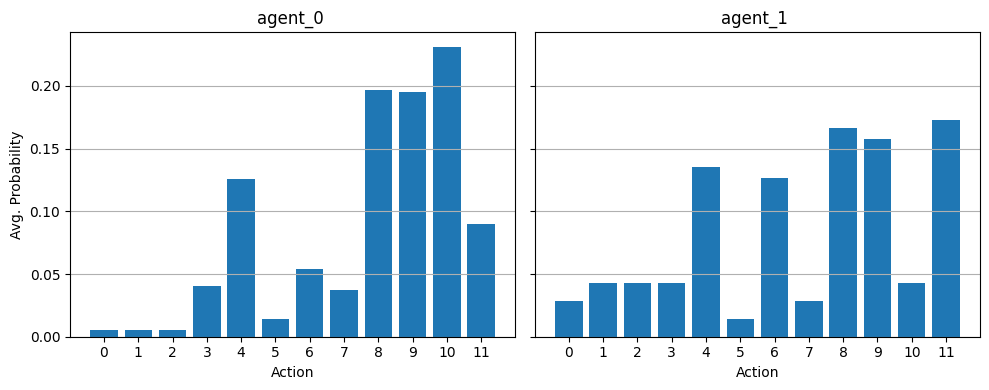

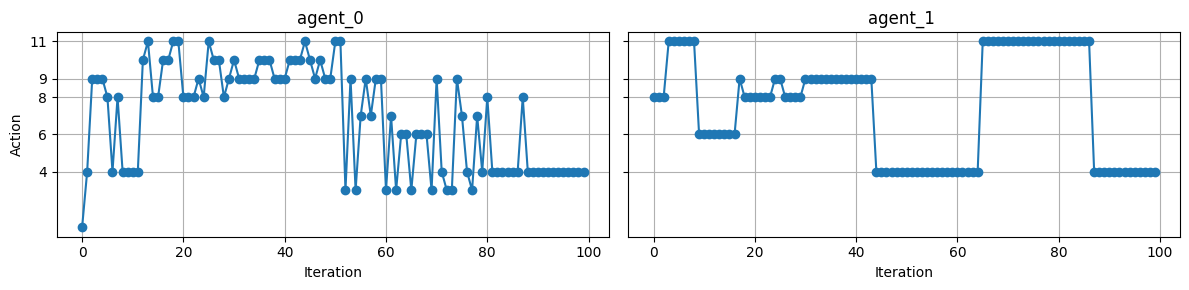

In [75]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [76]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00083333 0.00083333 0.00083333 0.08013282 0.20518412 0.00319444
 0.09574175 0.03584012 0.15631826 0.16708191 0.16993714 0.08406943]
agent_1 [0.01515152 0.02272727 0.02272727 0.02272727 0.27272727 0.00757576
 0.08333333 0.01515152 0.12121212 0.15151515 0.02272727 0.24242424]
Action with high probability for agent_0: [1, 5, 6]
Action with high probability for agent_1: [1, 5, 6]


# Random Agent vs Random Agent

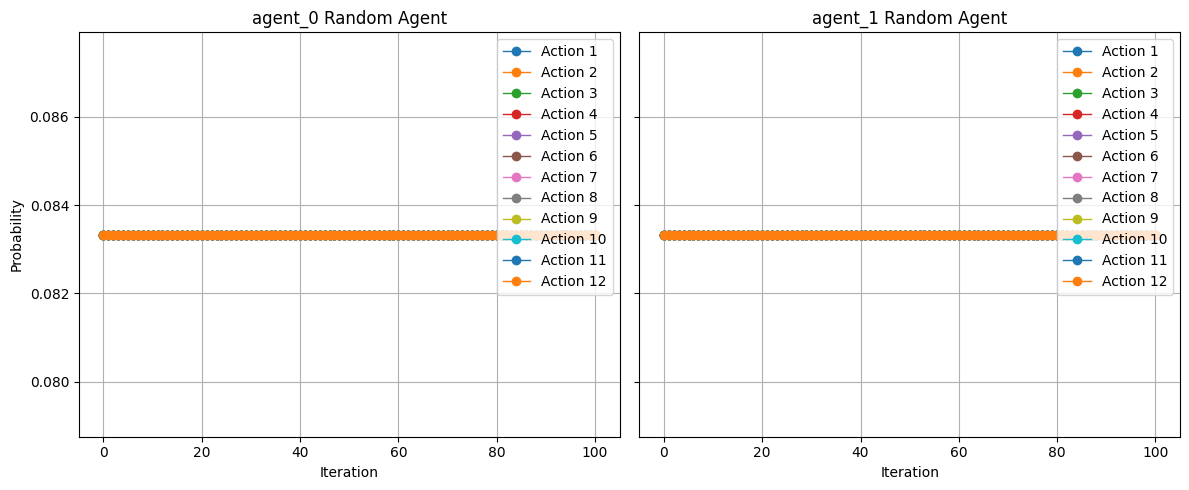

In [77]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=100, title_suffix="Random Agent")

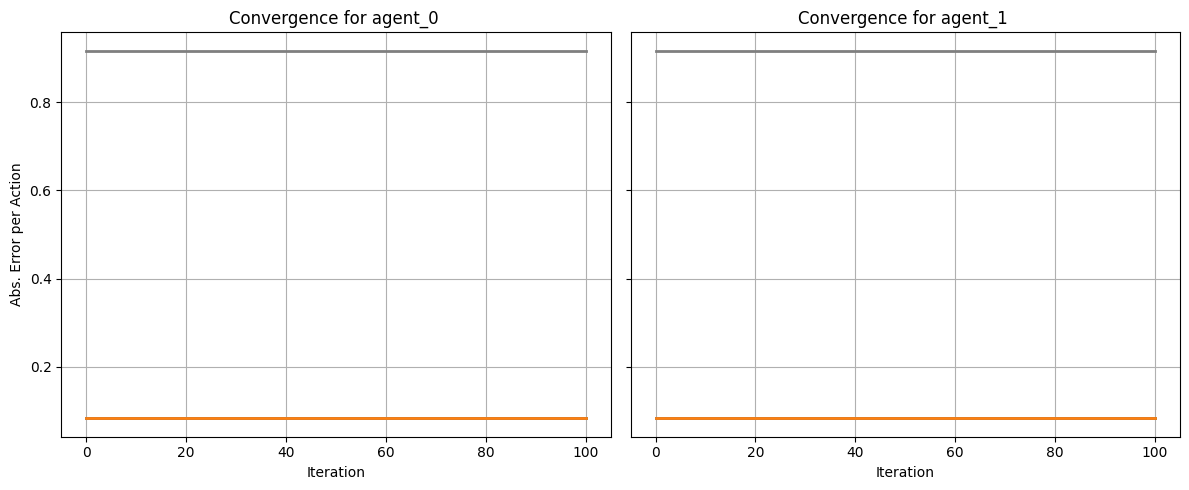

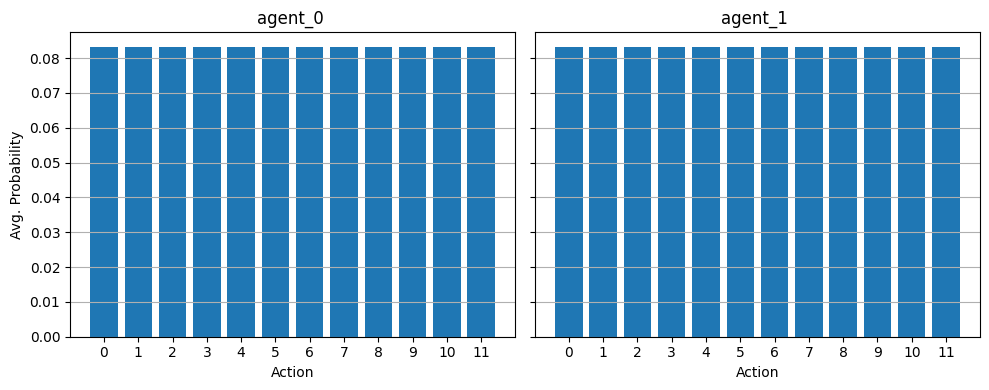

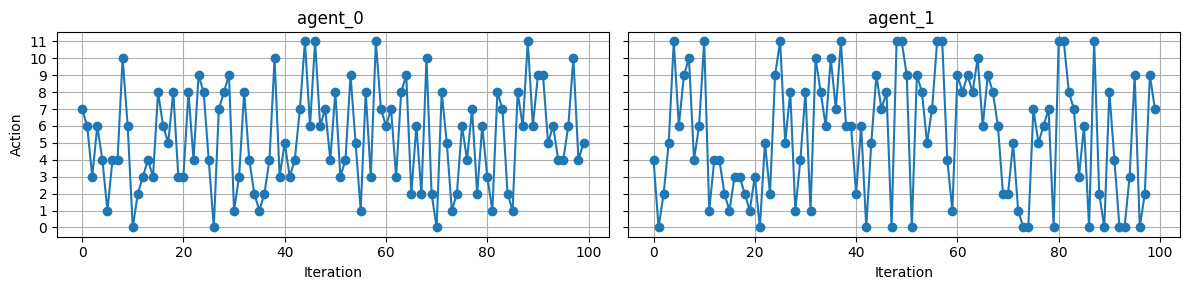

In [78]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

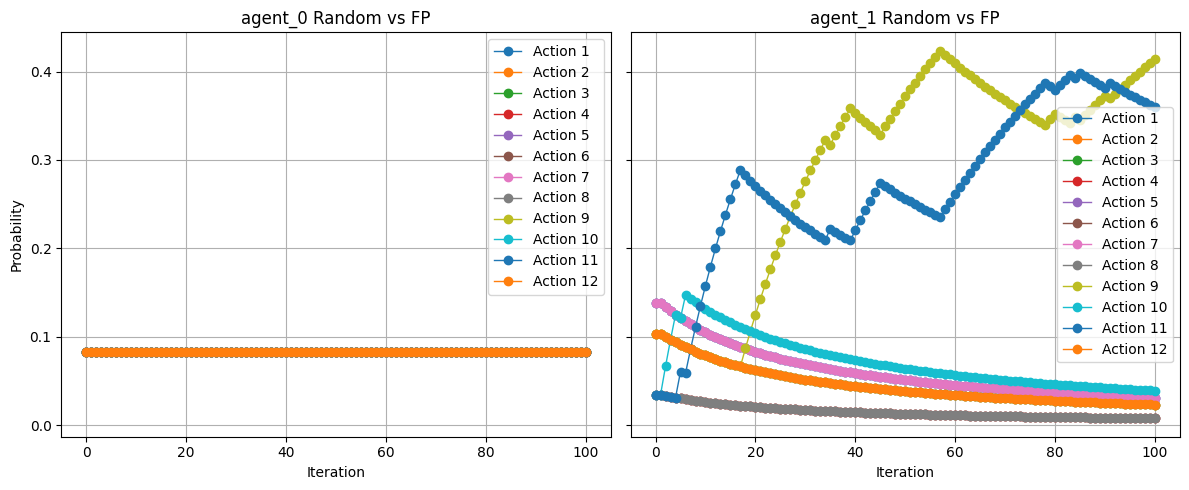

In [92]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=100, title_suffix="Random vs FP")

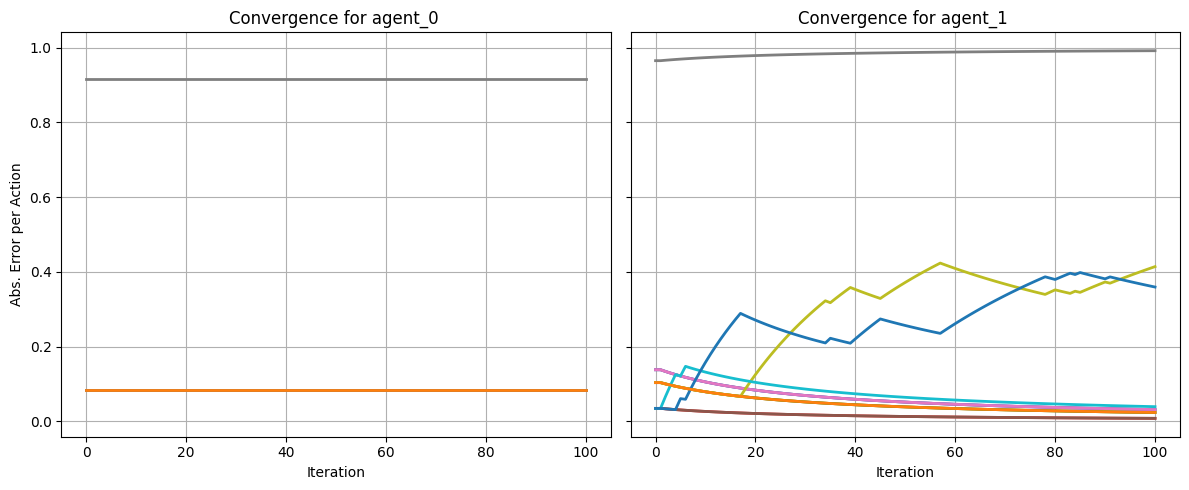

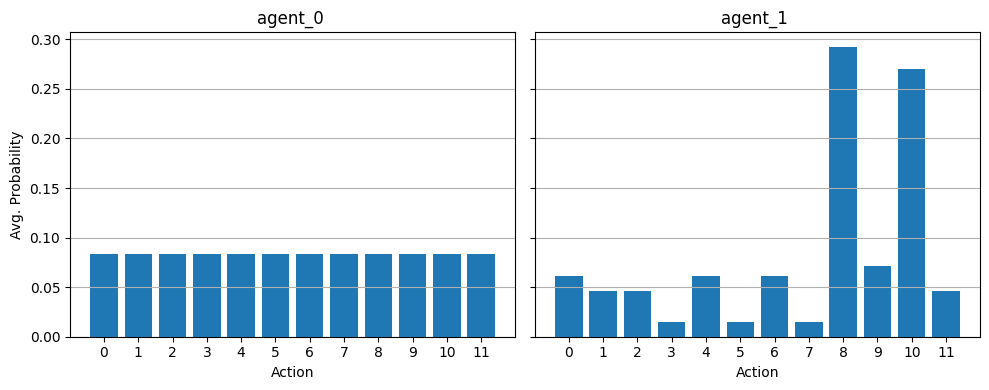

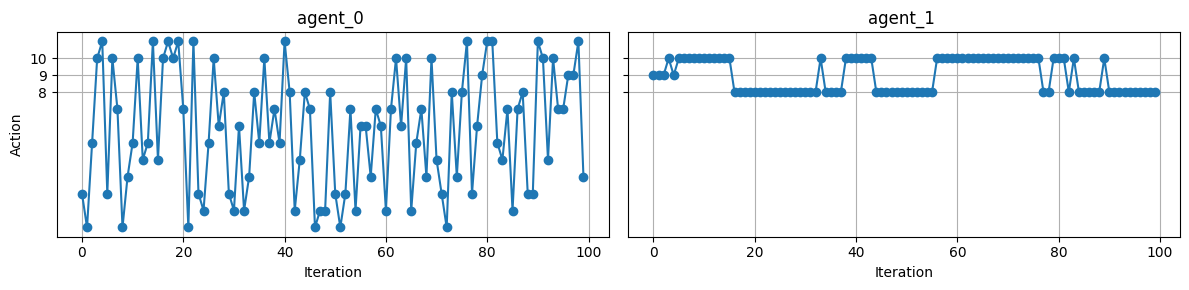

In [93]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [94]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
agent_1 [0.03125   0.0234375 0.0234375 0.0078125 0.03125   0.0078125 0.03125
 0.0078125 0.4140625 0.0390625 0.359375  0.0234375]
Action with high probability for agent_0: [1, 1, 10]
Action with high probability for agent_1: [2, 5, 5]


# Random Agent vs Regret Matching


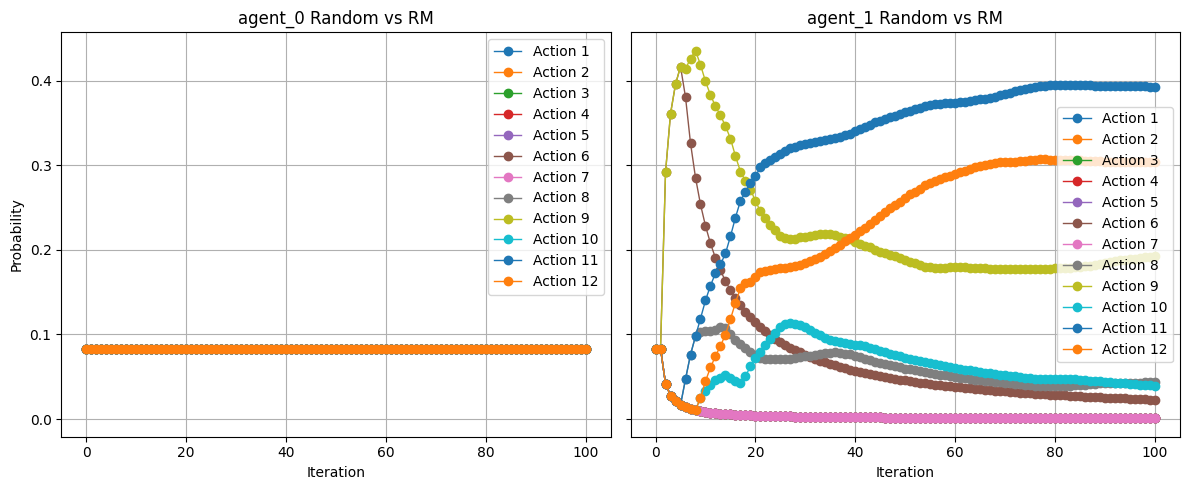

In [89]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=100, title_suffix="Random vs RM")

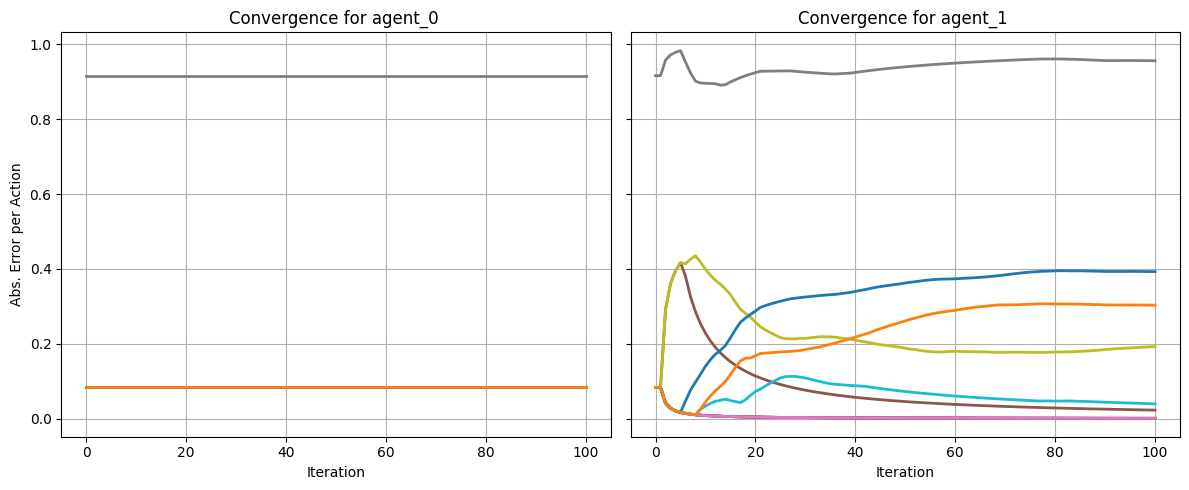

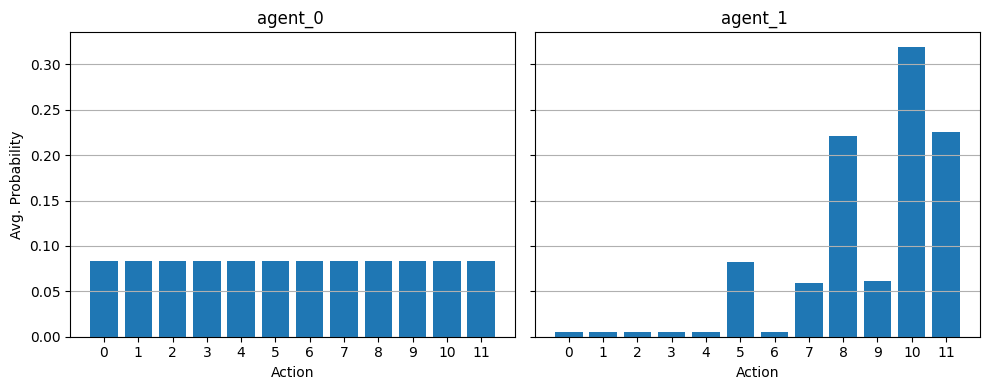

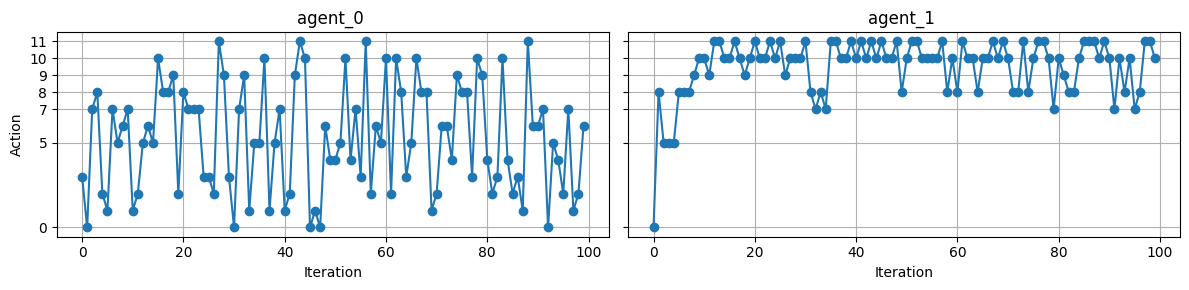

In [90]:
nash_equilibrium = {
    "agent_0": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # (2,4,6) es el índice 7
    "agent_1": [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [91]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
agent_1 [0.00096993 0.00387973 0.00096993 0.00193986 0.00096993 0.00387973
 0.0029098  0.00387973 0.23181377 0.00387973 0.56741028 0.17749758]
Action with high probability for agent_0: [1, 1, 10]
Action with high probability for agent_1: [3, 4, 5]
